In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
model = LocallyLinearEmbedding(n_components=2, n_neighbors=10, eigen_solver='auto', n_jobs=-1)

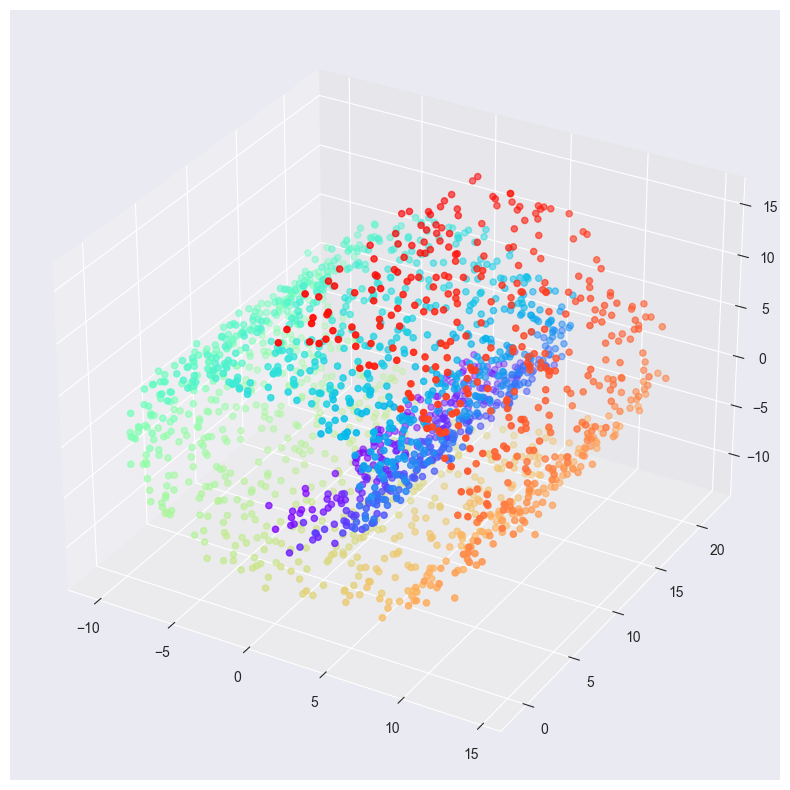

In [3]:
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples=2000, noise=0.5)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.rainbow)
plt.show()

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
reconstruction_error_pca = sum(pca.explained_variance_ratio_)

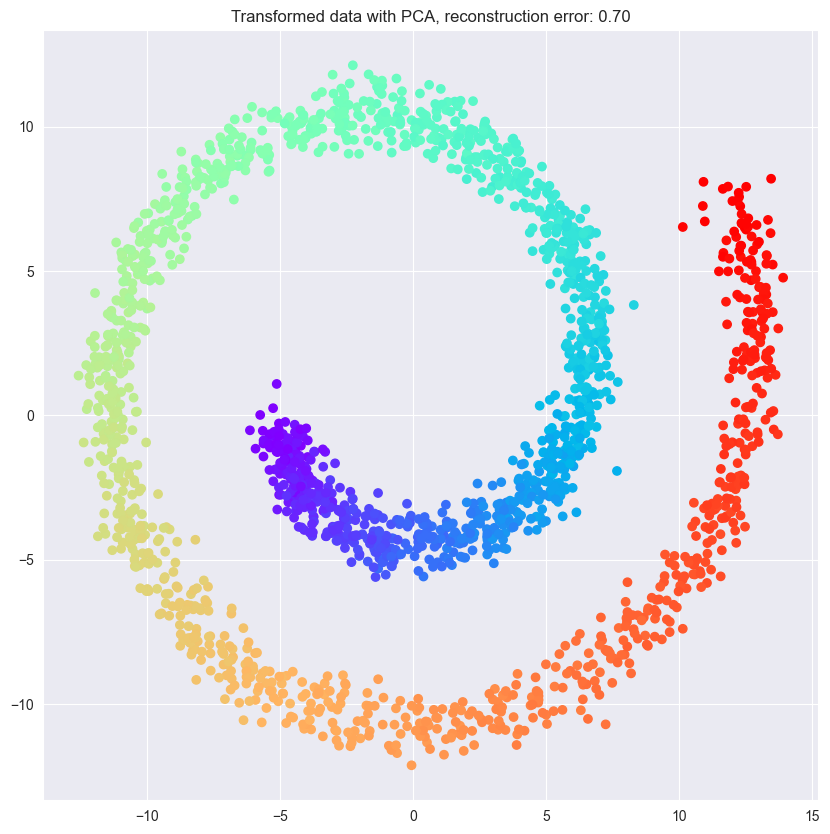

In [5]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.rainbow)
plt.title(f'Transformed data with PCA, reconstruction error: {reconstruction_error_pca:.2f}')
plt.show()

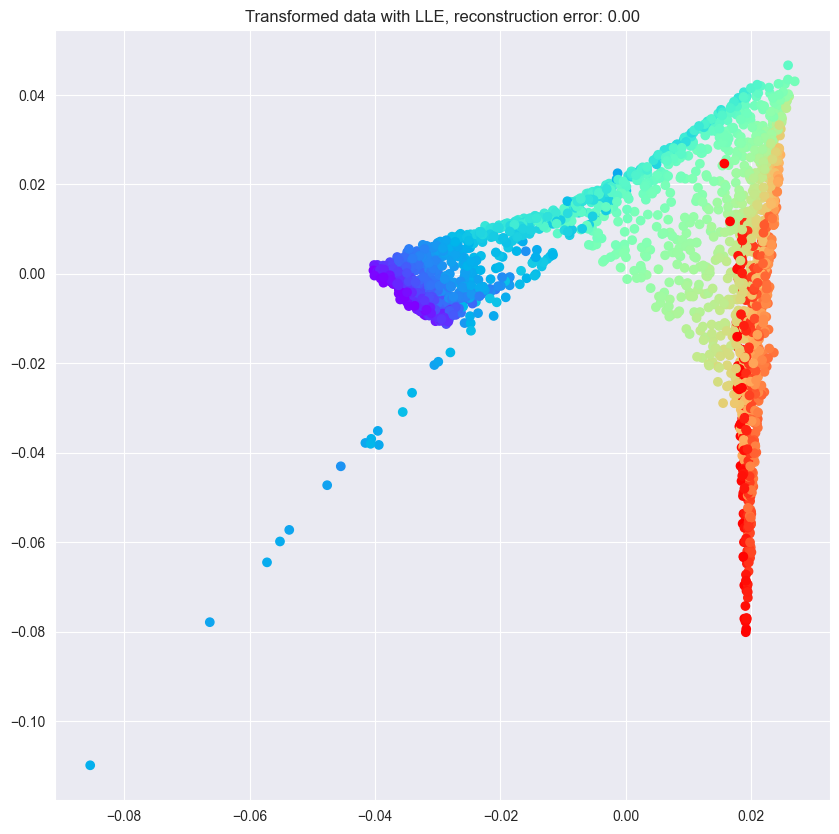

In [6]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, eigen_solver='auto', n_jobs=-1)
X_lle = lle.fit_transform(X)
reconstruction_error_lle = lle.reconstruction_error_
plt.figure(figsize=(10,10))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap=plt.cm.rainbow)
plt.title(f'Transformed data with LLE, reconstruction error: {reconstruction_error_lle:.2f}')
plt.show()

In [7]:
from sklearn.manifold import MDS
import sklearn.datasets as dts
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.datasets import fetch_olivetti_faces

In [29]:
def mapData(dist_matrix, X,y,metric,title):
    mds = MDS(metric=metric, dissimilarity='precomputed', random_state=42)
    pts = mds.fit_transform(dist_matrix)
    fig = plt.figure(2, figsize=(15, 6))
    ax = fig.add_subplot(1,2,1)
    ax = sns.scatterplot(x=pts[:,0], y=pts[:,1], hue=y, palette=['r','g','b','c'])
    
    ax = fig.add_subplot(1,2,2)
    plt.scatter(pts[:,0], pts[:,1])
    
    for x,ind in zip(X, range(pts.shape[0])):
        im = x.reshape(64,64)
        imagebox = OffsetImage(im, zoom=0.3, cmap=plt.cm.gray)
        i = pts[ind,0]
        j = pts[ind,1]
        ab = AnnotationBbox(imagebox, (i, j), frameon=False)
        ax.add_artist(ab)
    plt.title(title)
    plt.show()

In [30]:
faces = dts.fetch_olivetti_faces()
X_faces = faces.data
y_faces = faces.target
ind = y_faces <4
X_faces = X_faces[ind]
y_faces = y_faces[ind]

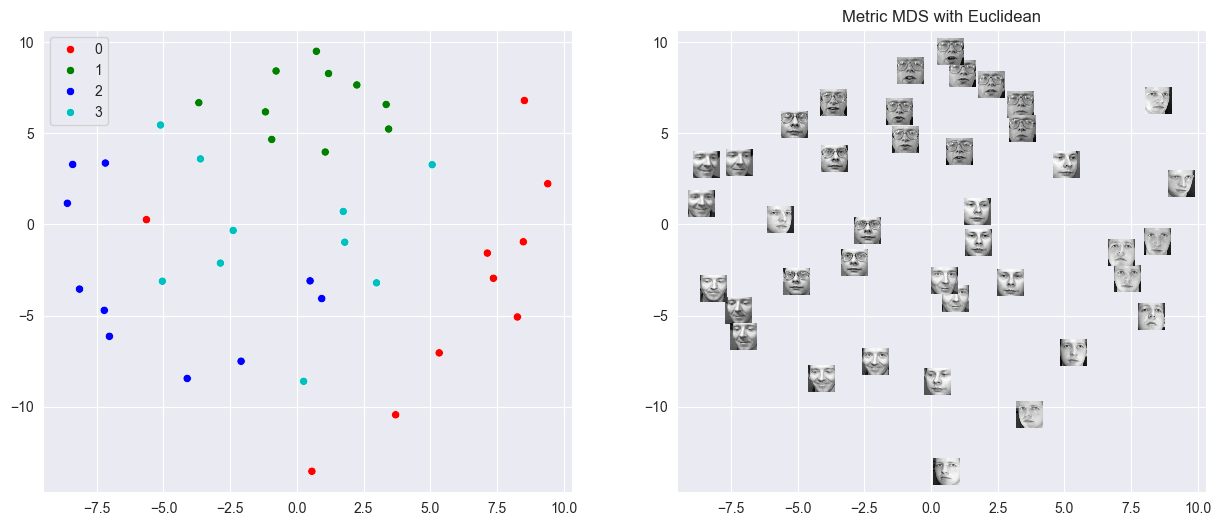

In [31]:
dist_euclid = euclidean_distances(X_faces)
mapData(dist_euclid, X_faces, y_faces, True, 'Metric MDS with Euclidean')